This is going to be an Exploratory Data Analysis on a data set(https://data.nysed.gov/downloads.php) of the grduation rate of highschoolers in NYC from the 2023-2024 school year. In this Analysis Report, I will explore the differrnt relationships between school types. 

Main Question: Does the school location affect the rate of drop outs? 
IF so, what other factors could be attributed to high dropout rates?
Are the drop out rat

Notes for ease of use:
146: Where Need/Resource Category
9316: Where District Starts
82436: Where School Starts


In [90]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grad_rates=pd.read_csv("HS_Grad_Rates_23-24.csv")

by_statewide=grad_rates[grad_rates['aggregation_type'].isin(["Statewide"])]
by_need_resource=grad_rates[grad_rates['aggregation_type'].isin(["Need/Resource Category"])]
by_county=grad_rates[grad_rates['aggregation_type'].isin(["County"])]
by_district=grad_rates[grad_rates['aggregation_type'].isin(["District"])]
by_school=grad_rates[grad_rates['aggregation_type'].isin(["School"])]

all_Frames=[by_statewide, by_need_resource, by_county, by_district, by_school]
for frame in all_Frames:
    print("---------------------------------")
    print(frame.isna().sum())


C:\Users\fdram\AppData\Local\Temp\ipykernel_29716\3634332146.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  grad_rates=pd.read_csv("HS_Grad_Rates_23-24.csv")


---------------------------------
report_school_year              0
aggregation_index               0
aggregation_type                0
INSTITUTION_ID                144
aggregation_code                0
aggregation_name                0
lea_beds                      144
lea_name                      144
nrc_code                      144
nrc_desc                      144
county_code                   144
county_name                   144
nyc_ind                       144
boces_code                    144
boces_name                    144
membership_code                 0
membership_desc                 0
subgroup_code                   0
subgroup_name                   0
enroll_cnt                      0
grad_cnt                        0
grad_pct                        0
local_cnt                       0
local_pct                       0
reg_cnt                         0
reg_pct                         0
reg_adv_cnt                     0
reg_adv_pct                     0
non_diploma_cr

Now that I know that the columns that have missing values are missing for all rows for each data set, i can drop those rows as they hold no value for that data frame.

In [91]:
for frame in all_Frames:
    cols_to_drop=frame.columns[frame.isna().sum() > 0]
    frame.drop(columns=cols_to_drop, inplace=True)

for frame in all_Frames:
    print("---------------------------------")
    print(frame.isna().sum())

C:\Users\fdram\AppData\Local\Temp\ipykernel_29716\3705746303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame.drop(columns=cols_to_drop, inplace=True)


---------------------------------
report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_code              0
aggregation_name              0
membership_code               0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64
---------------------------------
report_school_year            0
aggregation_index             0
aggregation_type       

Now none of the frames have empty data columns.
Some of the data overlaps as there are different categories. There can be one school, and each row is a statistic by race, by cohort, gender. 

Just noticed that the 2018 Total Cohort-6 Year Outcome = 2018 Total Cohoty - 6 Year Outcome - August 2024 and same for the other years so I'll get rid of the 6 8 9 membership_code rows. Maybe the data will be cut in half. But maybe I should keep it cause that would indicate how many students maybe were on the roll for graduation before and after summer school. 

Now I have to focus on what relationships I want to see. 
1. District vs. graduation rate
2. County vs. graduation rate
3. gender vs. graduation rate
4. Race vs. enrollment rate per district 
5. Race vs. enrollment rate per county 
6. Summer school success per district
7. Summer school success rate per county
8. Regents diploma vs. district
9. Regents diploma vs. county
10. Year Outcome 4, 5, 6 vs. District
11. ELL vs. grad rate
12. disabled vs grad rate
13. economically disadvantaged
14. Homelessness
15. Did COVID have an effect on graduation rates or dropout rates
16. Did students who came in 2020 take longer to graduate?

After i get the summer school stuff out the way, I'll start using the data for August 2024 or else we'll be counting double. The 6, 8, and 9 memborship code lines will be removed.
 




Histogram/Pairwise plots
Because the data set has so many different categories, I'll focus on each County. Schools will be too much and Districts may not include all New York Schools and  I'll sum up the counts and do the histograms based on that. That way I'll get all students that graduated that year. The varibales are: 
    1. enroll_cnt
    2. gard_cny
    3. local_cnt
    4. reg_cnt
    5. reg_adv_cnt
    6. non_diploma_credential_cnt
    7. still_enr_cnt
    8. ged_cnt
    9. dropout_cnt
    So we'll be left with 9 histograms

In [92]:
Main_frame=by_county.copy()

Main_frame.set_index("subgroup_name", inplace=True)

colNames=["membership_code", "membership_desc", "county_code", "county_name", "enroll_cnt", "grad_cnt", "local_cnt", "reg_cnt", "reg_adv_cnt", "non_diploma_credential_cnt", "still_enr_cnt", "ged_cnt", "dropout_cnt"]
Main_frame=Main_frame.loc["All Students", colNames]
Main_frame=Main_frame.replace("-", np.nan)
Main_frame=Main_frame.astype({
    "enroll_cnt": "float",
    "grad_cnt": "float",
    "local_cnt": "float",
    "reg_cnt": "float",
    "reg_adv_cnt": "float",
    "non_diploma_credential_cnt": "float",
    "still_enr_cnt": "float",
    "ged_cnt": "float",
    "dropout_cnt": "float"
})

Main_frame=Main_frame[Main_frame["membership_desc"].str.contains("2018 Total Cohort - 6 Year Outcome - August 2024|2019 Total Cohort - 5 Year Outcome - August 2024|2020 Total Cohort - 4 Year Outcome - August 2024")]
numeric_colNames=["enroll_cnt", "grad_cnt", "local_cnt", "reg_cnt", "reg_adv_cnt", "non_diploma_credential_cnt", "still_enr_cnt", "ged_cnt", "dropout_cnt"]
new_new=Main_frame.groupby("county_name")[numeric_colNames].sum()
print(new_new.head())


             enroll_cnt  grad_cnt  local_cnt  reg_cnt  reg_adv_cnt  non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt
county_name                                                                                                                        
ALBANY           9000.0    7988.0       73.0   3888.0       4027.0                        66.0          377.0     10.0        555.0
ALLEGANY         1442.0    1305.0       29.0    835.0        441.0                        22.0           29.0      1.0         85.0
BRONX           42174.0   34725.0      815.0  26763.0       7147.0                       419.0         2863.0    324.0       3791.0
BROOME           5985.0    5074.0      115.0   2719.0       2240.0                        71.0          201.0     97.0        536.0
CATTARAUGUS      2883.0    2538.0       18.0   1616.0        904.0                        41.0           72.0     25.0        206.0


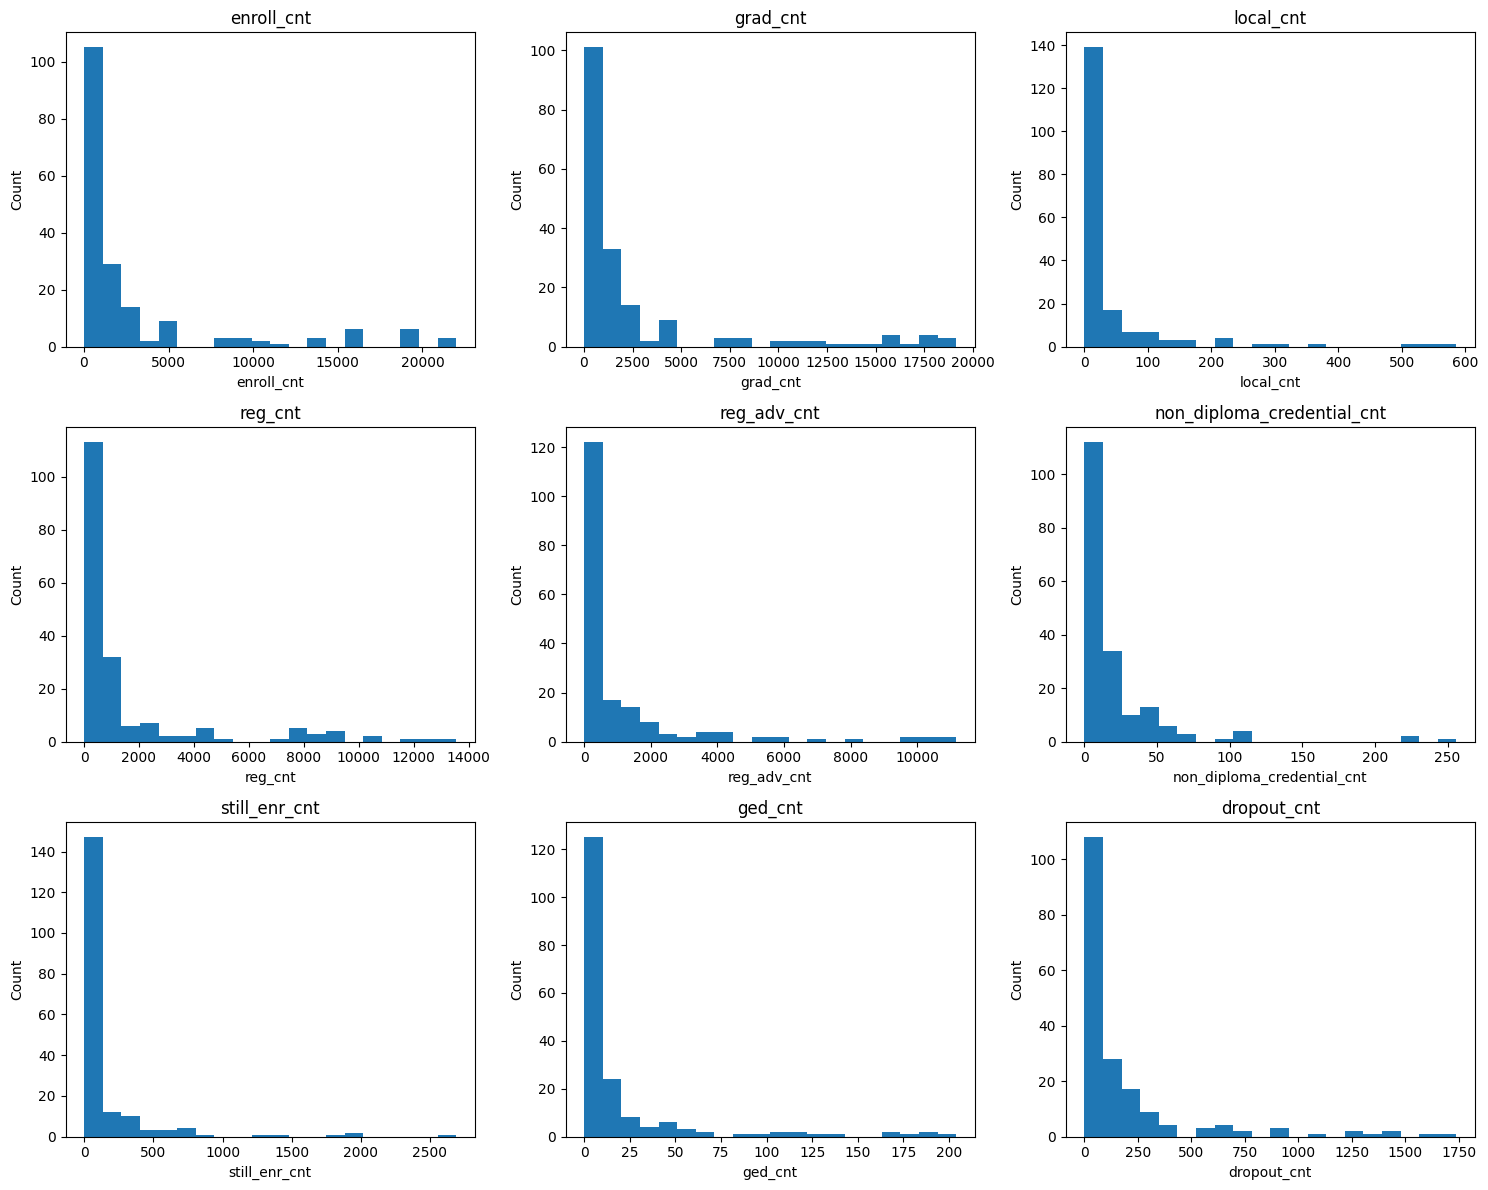

In [104]:

fig, axes = plt.subplots(3, 3, figsize=(15, 12))  
axes = axes.flatten()  

for i, col in enumerate(numeric_colNames):
    axes[i].hist(Main_frame[col], bins=20)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()  
plt.show()

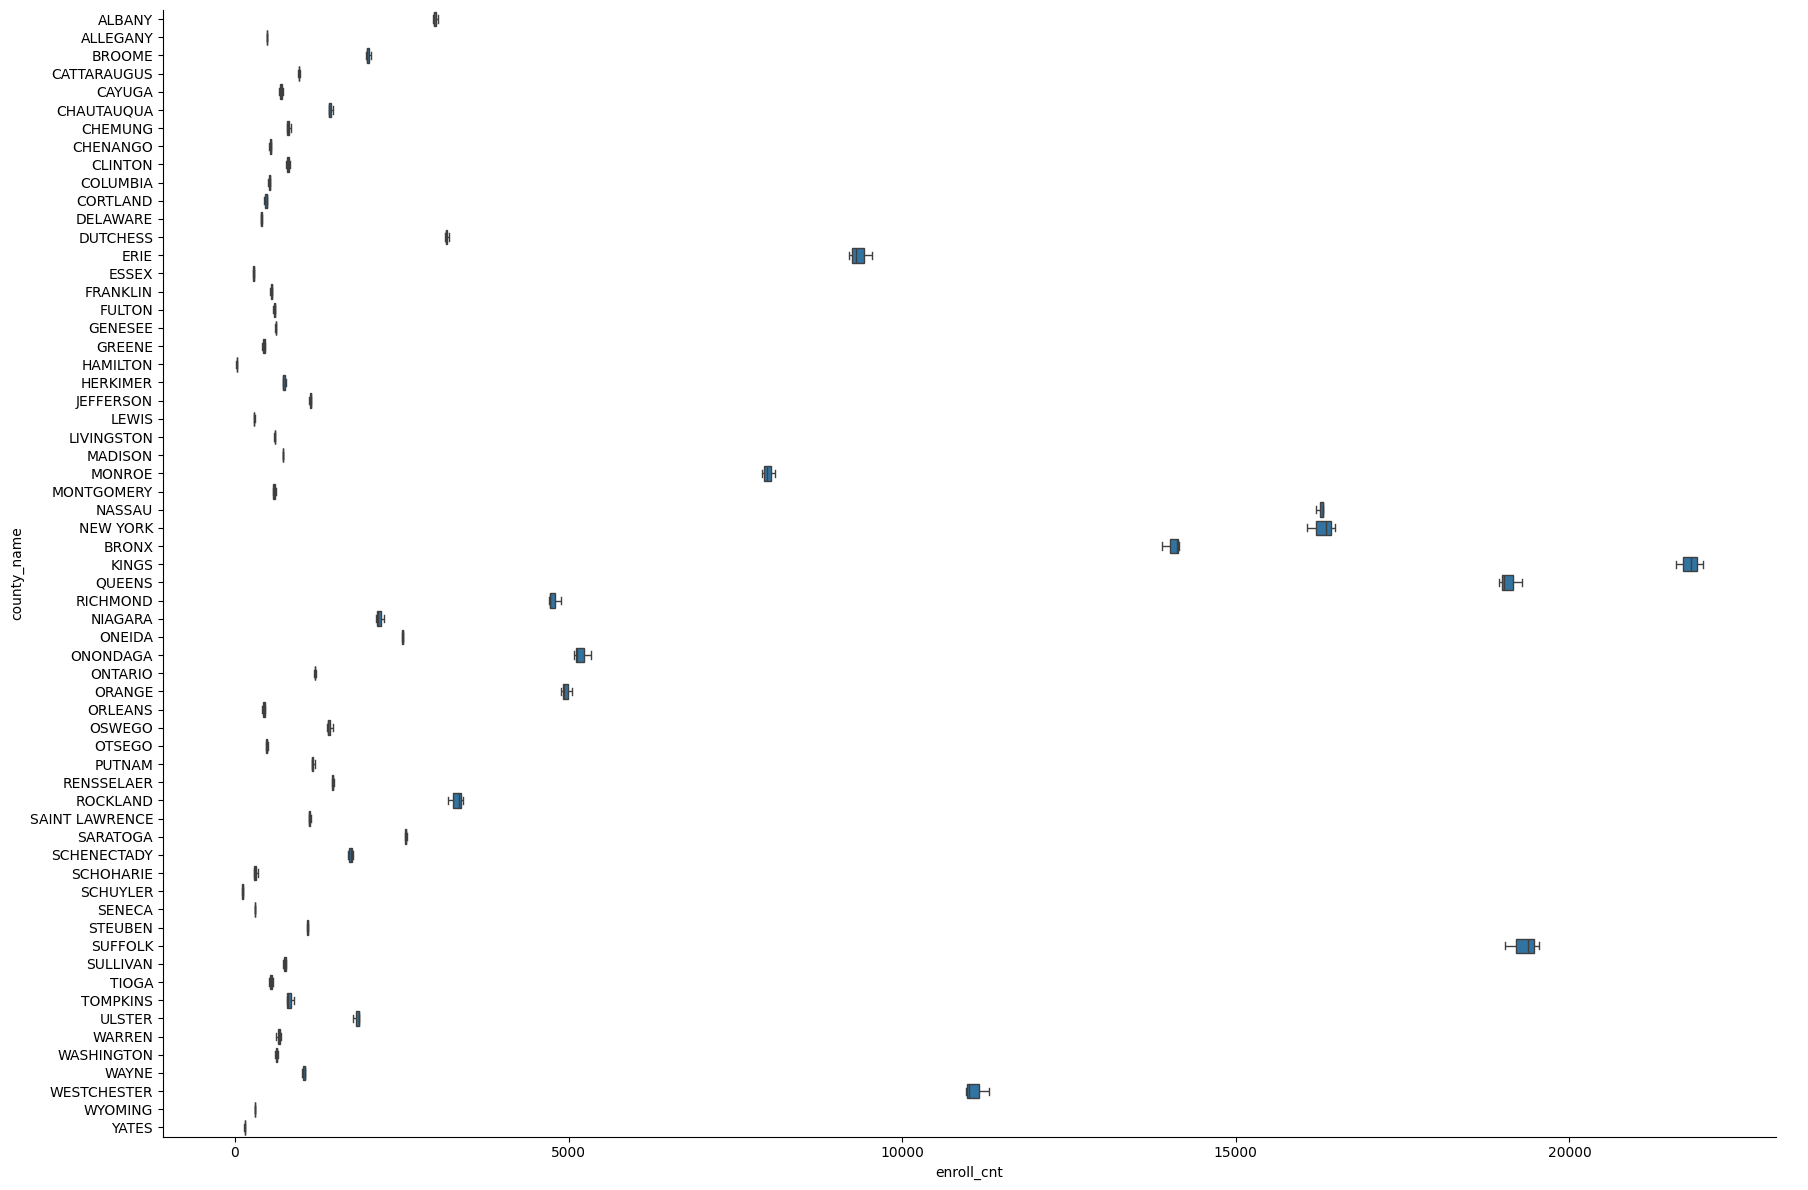

In [116]:
sns.catplot(data=Main_frame, y="county_name", x="enroll_cnt", kind="box", height=12, aspect=1.5)

pd.set_option('display.max_columns', None)       
pd.set_option('display.width', 1000)            
pd.set_option('display.max_colwidth', None)     

#Might have to use gender instead of county. 